In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import nltk
# import spacy
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import MinMaxScaler
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from pythainlp.corpus import thai_stopwords
from pythainlp.tokenize import word_tokenize
from sklearn.metrics import ConfusionMatrixDisplay , confusion_matrix


In [2]:
df = pd.read_csv(r'C:\Users\PC\Downloads\2class_true_fake_only_2025.csv',index_col=0)
df

Verification_Status                                     processed_Text  \
0               ‡∏Ç‡πà‡∏≤‡∏ß‡∏õ‡∏•‡∏≠‡∏°    ‡∏Å‡∏£‡∏°‡∏û‡∏±‡∏í‡∏ô‡∏≤‡∏ò‡∏∏‡∏£‡∏Å‡∏¥‡∏à‡∏Å‡∏≤‡∏£ ‡∏Ñ‡πâ‡∏≤ ‡∏≠‡∏ô‡∏∏‡∏ç‡∏≤‡∏ï ‡πÉ‡∏ö ‡∏ó‡∏∞‡πÄ‡∏ö‡∏µ‡∏¢‡∏ô ‡∏û‡∏≤‡∏ì‡∏¥...   
1               ‡∏Ç‡πà‡∏≤‡∏ß‡∏õ‡∏•‡∏≠‡∏°    ‡∏Å‡∏£‡∏°‡∏Å‡∏≤‡∏£‡∏à‡∏±‡∏î‡∏´‡∏≤‡∏á‡∏≤‡∏ô ‡∏™‡πà‡∏á‡πÄ‡∏™‡∏£‡∏¥‡∏° ‡πÑ‡∏ó‡∏¢   ‡πÄ‡∏â‡∏•‡∏µ‡πà‡∏¢   1,500...   
2               ‡∏Ç‡πà‡∏≤‡∏ß‡∏õ‡∏•‡∏≠‡∏°    ‡∏ï‡∏•‡∏≤‡∏î ‡∏´‡∏•‡∏±‡∏Å‡∏ó‡∏£‡∏±‡∏û‡∏¢‡πå‡πÅ‡∏´‡πà‡∏á‡∏õ‡∏£‡∏∞‡πÄ‡∏ó‡∏®‡πÑ‡∏ó‡∏¢ ‡∏ó‡∏∏‡∏ô ‡∏´‡∏≤ ‡∏Ñ‡πà‡∏≤ ‡∏Ç‡πâ‡∏≤‡∏ß...   
3               ‡∏Ç‡πà‡∏≤‡∏ß‡∏õ‡∏•‡∏≠‡∏°    ‡∏ï‡∏•‡∏≤‡∏î‡∏´‡∏•‡∏±‡∏Å‡∏ó‡∏£‡∏±‡∏û‡∏¢‡πå   ‡∏û‡∏≠‡∏£‡πå‡∏ï ‡∏´‡∏∏‡πâ‡∏ô ‡∏ò‡∏ô‡∏≤‡∏Ñ‡∏≤‡∏£ ‡∏Å‡∏≥‡πÑ‡∏£   48...   
4               ‡∏Ç‡πà‡∏≤‡∏ß‡∏õ‡∏•‡∏≠‡∏°    ‡∏ö‡∏£‡∏¥‡∏´‡∏≤‡∏£ ‡∏ò.  ‡∏≠‡∏≠‡∏°‡∏™‡∏¥‡∏ô‡πÑ‡∏•‡∏ô‡πå ‡πÄ‡∏ä‡∏¥‡∏ç‡∏ä‡∏ß‡∏ô ‡∏Å‡∏π‡πâ ‡πÄ‡∏á‡∏¥‡∏ô ‡∏´‡∏•‡∏±‡∏Å ...   
...                  ...                                                ...   
5999            ‡∏Ç‡πà‡∏≤‡∏ß‡∏à‡∏£‡∏¥‡∏á  ‡πÅ‡∏£‡∏á‡∏á‡∏≤‡∏ô ‡∏î‡πâ‡∏≤‡∏ß ‡∏ó‡∏≥ ‡∏á‡∏≤‡∏ô     13   ‡∏Å.‡∏û.   66   ‡∏≠‡∏≤‡∏¢‡∏∏ ‡∏õ...   
6000            ‡∏Ç‡πà‡∏≤‡∏ß‡∏à‡∏£‡∏¥‡∏á  ‡∏Å‡∏ó‡∏°. ‡∏Ñ‡∏∏‡∏° ‡πÄ‡∏Ç‡πâ‡∏° ‡∏™‡∏∏‡πà‡∏° ‡∏ï‡∏£‡∏ß‡∏à ‡∏£‡πâ‡∏≤‡∏ô ‡∏Ñ‡πâ‡∏≤ ‡∏™‡∏ñ‡∏≤‡∏ô ‡∏ö‡∏£‡∏¥‡∏Å‡∏≤‡∏£  ...   
6001            ‡∏Ç‡πà‡∏≤‡∏ß‡∏à‡∏£‡∏¥‡∏á  ‡∏Ñ‡∏£‡∏°.   ‡∏≠‡∏ô‡∏∏‡∏°‡∏±‡∏ï‡∏¥   12   ‡∏°‡∏≤‡∏ï‡∏£‡∏Å‡∏≤‡∏£   ‡πÅ‡∏Å‡πâ ‡∏õ‡∏±‡∏ç‡∏´‡∏≤ ‡∏ù‡∏∏‡πà‡∏ô...   
6002            ‡∏Ç‡πà‡∏≤‡∏ß‡∏à‡∏£‡∏¥‡∏á  ‡∏™‡∏ò.   ‡∏â‡∏µ‡∏î ‡∏ß‡∏±‡∏Ñ‡∏ã‡∏µ‡∏ô ‡∏ö‡∏π‡∏™‡πÄ‡∏ï‡∏≠‡∏£‡πå ‡∏â‡∏µ‡∏î ‡∏ã‡∏¥‡πÇ‡∏ô‡πÅ‡∏ß‡∏Ñ     24  ...   
6003            ‡∏Ç‡πà‡∏≤‡∏ß‡∏à‡∏£‡∏¥‡∏á   ‡∏ï‡∏¥‡∏î ‡πÇ‡∏Ñ‡∏ß‡∏¥‡∏î   19   ‡πÄ‡∏Å‡∏ì‡∏ë‡πå ‡∏™‡∏ò.   ‡πÄ‡∏ö‡∏¥‡∏Å‡∏õ‡∏£‡∏∞‡∏Å‡∏±‡∏ô ‡∏™‡∏∏‡∏Ç‡∏†‡∏≤‡∏û     

      noun_count  Word_Count  entity_count  class  sum_bow  
0             12          17             3      1       16  
1              4          19             9      1        8  
2              8          22             7      1       11  
3              6          13             2      1        7  
4              7          18             2      1       13  
...          ...         ...           ...    ...      ...  
5999           9          35             6      0       13  
6000           6          13             1      0        9  
6001           5          16             0      0        7  
6002          11          30            18      0        8  
6003           5          18             2      0        7  

[6004 rows x 7 columns]

In [3]:
class_names , _  = np.unique(df['Verification_Status'],return_inverse=True)
class_names
name = ['True_News','Fake_News']


In [4]:
df = df[['processed_Text','noun_count','Word_Count','entity_count','sum_bow','class']]
df

processed_Text  noun_count  \
0       ‡∏Å‡∏£‡∏°‡∏û‡∏±‡∏í‡∏ô‡∏≤‡∏ò‡∏∏‡∏£‡∏Å‡∏¥‡∏à‡∏Å‡∏≤‡∏£ ‡∏Ñ‡πâ‡∏≤ ‡∏≠‡∏ô‡∏∏‡∏ç‡∏≤‡∏ï ‡πÉ‡∏ö ‡∏ó‡∏∞‡πÄ‡∏ö‡∏µ‡∏¢‡∏ô ‡∏û‡∏≤‡∏ì‡∏¥...          12   
1       ‡∏Å‡∏£‡∏°‡∏Å‡∏≤‡∏£‡∏à‡∏±‡∏î‡∏´‡∏≤‡∏á‡∏≤‡∏ô ‡∏™‡πà‡∏á‡πÄ‡∏™‡∏£‡∏¥‡∏° ‡πÑ‡∏ó‡∏¢   ‡πÄ‡∏â‡∏•‡∏µ‡πà‡∏¢   1,500...           4   
2       ‡∏ï‡∏•‡∏≤‡∏î ‡∏´‡∏•‡∏±‡∏Å‡∏ó‡∏£‡∏±‡∏û‡∏¢‡πå‡πÅ‡∏´‡πà‡∏á‡∏õ‡∏£‡∏∞‡πÄ‡∏ó‡∏®‡πÑ‡∏ó‡∏¢ ‡∏ó‡∏∏‡∏ô ‡∏´‡∏≤ ‡∏Ñ‡πà‡∏≤ ‡∏Ç‡πâ‡∏≤‡∏ß...           8   
3       ‡∏ï‡∏•‡∏≤‡∏î‡∏´‡∏•‡∏±‡∏Å‡∏ó‡∏£‡∏±‡∏û‡∏¢‡πå   ‡∏û‡∏≠‡∏£‡πå‡∏ï ‡∏´‡∏∏‡πâ‡∏ô ‡∏ò‡∏ô‡∏≤‡∏Ñ‡∏≤‡∏£ ‡∏Å‡∏≥‡πÑ‡∏£   48...           6   
4       ‡∏ö‡∏£‡∏¥‡∏´‡∏≤‡∏£ ‡∏ò.  ‡∏≠‡∏≠‡∏°‡∏™‡∏¥‡∏ô‡πÑ‡∏•‡∏ô‡πå ‡πÄ‡∏ä‡∏¥‡∏ç‡∏ä‡∏ß‡∏ô ‡∏Å‡∏π‡πâ ‡πÄ‡∏á‡∏¥‡∏ô ‡∏´‡∏•‡∏±‡∏Å ...           7   
...                                                 ...         ...   
5999  ‡πÅ‡∏£‡∏á‡∏á‡∏≤‡∏ô ‡∏î‡πâ‡∏≤‡∏ß ‡∏ó‡∏≥ ‡∏á‡∏≤‡∏ô     13   ‡∏Å.‡∏û.   66   ‡∏≠‡∏≤‡∏¢‡∏∏ ‡∏õ...           9   
6000  ‡∏Å‡∏ó‡∏°. ‡∏Ñ‡∏∏‡∏° ‡πÄ‡∏Ç‡πâ‡∏° ‡∏™‡∏∏‡πà‡∏° ‡∏ï‡∏£‡∏ß‡∏à ‡∏£‡πâ‡∏≤‡∏ô ‡∏Ñ‡πâ‡∏≤ ‡∏™‡∏ñ‡∏≤‡∏ô ‡∏ö‡∏£‡∏¥‡∏Å‡∏≤‡∏£  ...           6   
6001  ‡∏Ñ‡∏£‡∏°.   ‡∏≠‡∏ô‡∏∏‡∏°‡∏±‡∏ï‡∏¥   12   ‡∏°‡∏≤‡∏ï‡∏£‡∏Å‡∏≤‡∏£   ‡πÅ‡∏Å‡πâ ‡∏õ‡∏±‡∏ç‡∏´‡∏≤ ‡∏ù‡∏∏‡πà‡∏ô...           5   
6002  ‡∏™‡∏ò.   ‡∏â‡∏µ‡∏î ‡∏ß‡∏±‡∏Ñ‡∏ã‡∏µ‡∏ô ‡∏ö‡∏π‡∏™‡πÄ‡∏ï‡∏≠‡∏£‡πå ‡∏â‡∏µ‡∏î ‡∏ã‡∏¥‡πÇ‡∏ô‡πÅ‡∏ß‡∏Ñ     24  ...          11   
6003   ‡∏ï‡∏¥‡∏î ‡πÇ‡∏Ñ‡∏ß‡∏¥‡∏î   19   ‡πÄ‡∏Å‡∏ì‡∏ë‡πå ‡∏™‡∏ò.   ‡πÄ‡∏ö‡∏¥‡∏Å‡∏õ‡∏£‡∏∞‡∏Å‡∏±‡∏ô ‡∏™‡∏∏‡∏Ç‡∏†‡∏≤‡∏û             5   

      Word_Count  entity_count  sum_bow  class  
0             17             3       16      1  
1             19             9        8      1  
2             22             7       11      1  
3             13             2        7      1  
4             18             2       13      1  
...          ...           ...      ...    ...  
5999          35             6       13      0  
6000          13             1        9      0  
6001          16             0        7      0  
6002          30            18        8      0  
6003          18             2        7      0  

[6004 rows x 6 columns]

In [5]:

from gensim.models import Word2Vec , FastText
from gensim.models import KeyedVectors
docs = df['processed_Text'].apply(lambda x: x.split())  # ‡πÅ‡∏õ‡∏•‡∏á‡πÄ‡∏õ‡πá‡∏ô list ‡∏Ç‡∏≠‡∏á list


In [6]:
w2v_model = KeyedVectors.load_word2vec_format('E:\Thesis_git\WEB-Thai-Fake-News-Detection-with-LLM-Integration\Model_Development\DL_model\gensim_fasttext_3000_vec300_e500_mc1.bin', binary=False)


<>:1: SyntaxWarning: invalid escape sequence '\T'
<>:1: SyntaxWarning: invalid escape sequence '\T'
C:\Users\PC\AppData\Local\Temp\ipykernel_28948\2086664426.py:1: SyntaxWarning: invalid escape sequence '\T'
  w2v_model = KeyedVectors.load_word2vec_format('E:\Thesis_git\WEB-Thai-Fake-News-Detection-with-LLM-Integration\Model_Development\DL_model\gensim_fasttext_3000_vec300_e500_mc1.bin', binary=False)


In [7]:
import numpy as np

# ‡∏ü‡∏±‡∏á‡∏Å‡πå‡∏ä‡∏±‡∏ô‡πÅ‡∏õ‡∏•‡∏á‡∏Ñ‡∏≥‡πÄ‡∏õ‡πá‡∏ô‡πÄ‡∏ß‡∏Å‡πÄ‡∏ï‡∏≠‡∏£‡πå‡∏à‡∏≤‡∏Å‡πÇ‡∏°‡πÄ‡∏î‡∏•
def get_word2vec_embedding(text, model, vector_size=300):
    # ‡πÅ‡∏õ‡∏•‡∏á‡πÅ‡∏ï‡πà‡∏•‡∏∞‡∏Ñ‡∏≥‡πÉ‡∏ô‡∏Ç‡πâ‡∏≠‡∏Ñ‡∏ß‡∏≤‡∏°‡πÄ‡∏õ‡πá‡∏ô‡πÄ‡∏ß‡∏Å‡πÄ‡∏ï‡∏≠‡∏£‡πå
    vec = np.zeros((vector_size,))
    count = 0
    for word in text.split():
        if word in model:
            vec += model[word]
            count += 1
    # ‡∏´‡∏≤‡∏Å‡∏°‡∏µ‡∏Ñ‡∏≥‡πÉ‡∏ô‡∏Ç‡πâ‡∏≠‡∏Ñ‡∏ß‡∏≤‡∏°‡∏ó‡∏µ‡πà‡πÑ‡∏°‡πà‡∏≠‡∏¢‡∏π‡πà‡πÉ‡∏ô vocab ‡∏à‡∏∞‡∏Ñ‡∏≥‡∏ô‡∏ß‡∏ì‡∏Ñ‡πà‡∏≤‡πÄ‡∏â‡∏•‡∏µ‡πà‡∏¢‡∏Ç‡∏≠‡∏á‡πÄ‡∏ß‡∏Å‡πÄ‡∏ï‡∏≠‡∏£‡πå
    if count > 0:
        vec /= count
    return vec

# ‡∏™‡∏£‡πâ‡∏≤‡∏á‡πÄ‡∏ß‡∏Å‡πÄ‡∏ï‡∏≠‡∏£‡πå‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡πÅ‡∏ï‡πà‡∏•‡∏∞‡∏Ç‡πâ‡∏≠‡∏Ñ‡∏ß‡∏≤‡∏°
X_vectors = np.array([get_word2vec_embedding(text, w2v_model) for text in df['processed_Text']])


In [8]:
X_vectors = X_vectors.reshape(X_vectors.shape[0], 1, X_vectors.shape[1])
print(X_vectors.shape)  # (‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡∏ï‡∏±‡∏ß‡∏≠‡∏¢‡πà‡∏≤‡∏á, 1, 1000)


(6004, 1, 300)


In [9]:
# ‡∏£‡∏ß‡∏°‡πÄ‡∏ß‡∏Å‡πÄ‡∏ï‡∏≠‡∏£‡πå‡∏à‡∏≤‡∏Å word2vec ‡∏Å‡∏±‡∏ö‡∏ü‡∏µ‡πÄ‡∏à‡∏≠‡∏£‡πå‡πÄ‡∏ä‡∏¥‡∏á‡∏ï‡∏±‡∏ß‡πÄ‡∏•‡∏Ç‡∏≠‡∏∑‡πà‡∏ô‡πÜ
numeric_features_3D = df[['noun_count', 'Word_Count', 'entity_count', 'sum_bow']].values.reshape(-1, 1, 4)
X_combined = np.concatenate([X_vectors, numeric_features_3D], axis=-1)
X_combined.shape

(6004, 1, 304)

In [10]:
y = df['class']
y

0       1
1       1
2       1
3       1
4       1
       ..
5999    0
6000    0
6001    0
6002    0
6003    0
Name: class, Length: 6004, dtype: int64

In [11]:
y_onehot = to_categorical(y, num_classes=2)
print("One-Hot encoded y_train:", y_onehot[:10])  # ‡∏î‡∏π‡∏ï‡∏±‡∏ß‡∏≠‡∏¢‡πà‡∏≤‡∏á
print("Classes in y_train_onehot:", np.argmax(y_onehot, axis=1))

One-Hot encoded y_train: [[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]
Classes in y_train_onehot: [1 1 1 ... 0 0 0]


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_combined, y_onehot, test_size=0.2, random_state=42)
X_train.shape , y_train.shape

((4803, 1, 304), (4803, 2))

Model: "functional"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)        ‚îÉ Output Shape      ‚îÉ    Param # ‚îÉ Connected to      ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ input_layer         ‚îÇ (None, 1, 304)    ‚îÇ          0 ‚îÇ -                 ‚îÇ
‚îÇ (InputLayer)        ‚îÇ                   ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ lstm (LSTM)         ‚îÇ (None, 1, 128)    ‚îÇ    221,696 ‚îÇ input_layer[0][0] ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ batch_normalization ‚îÇ (None, 1, 128)    ‚îÇ        512 ‚îÇ lstm[0][0]        ‚îÇ
‚îÇ (BatchNormalizatio‚Ä¶ ‚îÇ                   ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout (Dropout)   ‚îÇ (None, 1, 128)    ‚îÇ          0 ‚îÇ batch_normalizat‚Ä¶ ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ lstm_1 (LSTM)       ‚îÇ (None, 1, 128)    ‚îÇ    131,584 ‚îÇ dropout[0][0]     ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ batch_normalizatio‚Ä¶ ‚îÇ (None, 1, 128)    ‚îÇ        512 ‚îÇ lstm_1[0][0]      ‚îÇ
‚îÇ (BatchNormalizatio‚Ä¶ ‚îÇ                   ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_1 (Dropout) ‚îÇ (None, 1, 128)    ‚îÇ          0 ‚îÇ batch_normalizat‚Ä¶ ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ lstm_2 (LSTM)       ‚îÇ (None, 1, 128)    ‚îÇ    131,584 ‚îÇ dropout_1[0][0]   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ batch_normalizatio‚Ä¶ ‚îÇ (None, 1, 128)    ‚îÇ        512 ‚îÇ lstm_2[0][0]      ‚îÇ
‚îÇ (BatchNormalizatio‚Ä¶ ‚îÇ                   ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_2 (Dropout) ‚îÇ (None, 1, 128)    ‚îÇ          0 ‚îÇ batch_normalizat‚Ä¶ ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚

 Total params: 891,458 (3.40 MB)

 Trainable params: 890,050 (3.40 MB)

 Non-trainable params: 1,408 (5.50 KB)

Epoch 1/200
19/19 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 8s 77ms/step - accuracy: 0.6042 - loss: 5.4690 - val_accuracy: 0.5196 - val_loss: 4.9424 - learning_rate: 5.0000e-04
Epoch 2/200
19/19 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 44ms/step - accuracy: 0.7410 - loss: 4.7528 - val_accuracy: 0.5196 - val_loss: 4.5567 - learning_rate: 5.0000e-04
Epoch 3/200
19/19 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 44ms/step - accuracy: 0.7966 - loss: 4.2898 - val_accuracy: 0.5196 - val_loss: 4.2001 - learning_rate: 5.0000e-04
Epoch 4/200
19/19 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 44ms/step - accuracy: 0.8168 - loss: 3.8330 - val_accuracy: 0.5196 - val_loss: 3.8879 - learning_rate: 5.0000e-04
Epoch 5/200
19/19 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 44ms/step - accuracy: 0.8365 - loss: 3.5227 - val_accuracy: 0.5196 - val_loss: 3.6237 - learning_rate: 5.0000e-04
Epoch 6/200
19/19 ‚î

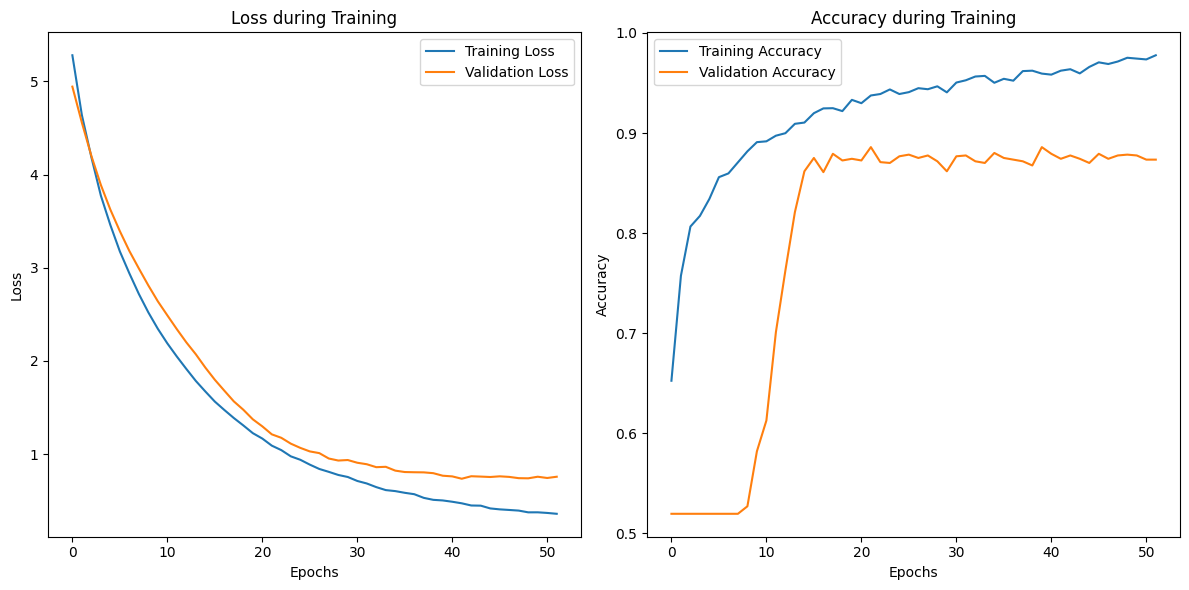

In [13]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Input, LSTM, Dropout, Dense, BatchNormalization, 
                                     MultiHeadAttention, Reshape, GlobalAveragePooling1D)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


# Best parameters
params = {
    'num_lstm_layers': 4,
    'lstm_units': 128,
    'dropout_rate': 0.3074051422941552,
    'reg_strength': 0.004280064931404508,
    'learning_rate': 0.0005,
    'batch_size': 256,
    'num_heads': 8,
    'key_dim': 64,
    'dense_units': 64
}
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Input shape (‡πÄ‡∏õ‡∏•‡∏µ‡πà‡∏¢‡∏ô‡∏ï‡∏≤‡∏° dataset ‡∏Ç‡∏≠‡∏á‡∏Ñ‡∏∏‡∏ì)
input_shape = (1, 304)  # ‡∏ï‡∏±‡∏ß‡∏≠‡∏¢‡πà‡∏≤‡∏á: 1 timestep, 304 features
num_classes = 2         # ‡∏ï‡∏±‡∏ß‡∏≠‡∏¢‡πà‡∏≤‡∏á: 3 ‡∏Ñ‡∏•‡∏≤‡∏™

# ‡∏™‡∏£‡πâ‡∏≤‡∏á‡πÇ‡∏°‡πÄ‡∏î‡∏•‡∏î‡πâ‡∏ß‡∏¢ Functional API
inputs = Input(shape=input_shape)
x = inputs

for i in range(params['num_lstm_layers']):
    return_seq = True if i < params['num_lstm_layers'] - 1 else False
    x = LSTM(params['lstm_units'],
             return_sequences=return_seq,
             kernel_regularizer=regularizers.l2(params['reg_strength']))(x)
    x = BatchNormalization()(x)
    x = Dropout(params['dropout_rate'])(x)

# ‡∏ñ‡πâ‡∏≤ output ‡πÄ‡∏õ‡πá‡∏ô 2D, reshape ‡πÉ‡∏´‡πâ MHA ‡πÉ‡∏ä‡πâ‡∏á‡∏≤‡∏ô‡πÑ‡∏î‡πâ
if len(x.shape) == 2:
    x = Reshape((1, params['lstm_units']))(x)

x = MultiHeadAttention(num_heads=params['num_heads'], key_dim=params['key_dim'])(x, x)
x = BatchNormalization()(x)

x = GlobalAveragePooling1D()(x)

x = Dense(params['dense_units'], activation='relu',
          kernel_regularizer=regularizers.l2(params['reg_strength']))(x)
x = BatchNormalization()(x)
x = Dropout(params['dropout_rate'])(x)

outputs = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=Adam(learning_rate=params['learning_rate'], clipnorm=1.0),
              loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

# üëá ‡∏ï‡∏±‡∏ß‡∏≠‡∏¢‡πà‡∏≤‡∏á‡∏Å‡∏≤‡∏£ Train model (‡πÄ‡∏õ‡∏•‡∏µ‡πà‡∏¢‡∏ô X_train, y_train, X_test, y_test ‡πÉ‡∏´‡πâ‡∏ï‡∏£‡∏á‡∏Å‡∏±‡∏ö‡∏Ç‡∏≠‡∏á‡∏Ñ‡∏∏‡∏ì)
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=200,
    batch_size=params['batch_size'],
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# üé® Plot Accuracy ‡πÅ‡∏•‡∏∞ Loss
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss during Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy during Training')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [14]:
# ‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å‡πÇ‡∏°‡πÄ‡∏î‡∏•‡∏´‡∏•‡∏±‡∏á‡∏Å‡∏≤‡∏£‡∏ù‡∏∂‡∏Å
model.save('best_lstm_model_2025.h5')  # ‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å‡πÄ‡∏õ‡πá‡∏ô‡πÑ‡∏ü‡∏•‡πå HDF5
